# Affine Transformations with Numpy

(via matrix application)

An affine transformation causes a change in geometry that can adjust the distances and angles between vectors, but preserves parallelism.

Affine transformations include:

- reflection (e.g. over an axis)
- scaling (changing length)
- shearing (displacement of each point in a fixed direction)
- rotation (changing angle)

In [1]:
import numpy as np

In [2]:
v = np.array([11,7])
v

array([11,  7])

In [3]:
import matplotlib.pyplot as plt

In [4]:
def plot_vectors(vectors, colors):
  # based on Hadrien Jean's plotVectors() under MIT license
  """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
  """
  plt.figure()
  plt.axvline(x=0, color="lightgray")
  plt.axhline(y=0, color="lightgray")

  for i in range(len(vectors)):
    x = np.concatenate([[0,0], vectors[i]])
    plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                angles="xy", scale_units="xy", scale=1, color=colors[i])

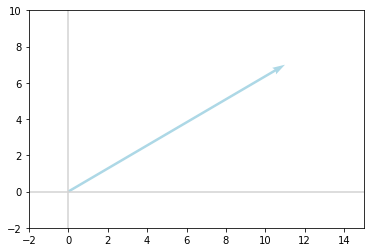

In [5]:
plot_vectors([v], ["lightblue"])
plt.xlim(-2,15)
plt.ylim(-2, 10)
plt.show()

## Multiplication with identity matrix

Multiplying a matrix with a vector can linearly transform the vector i.e. rotate or scale it. Only applying an identity matrix does not change the vector.

In [6]:
I = np.array([[1,0], [0,1]])
I

array([[1, 0],
       [0, 1]])

In [7]:
Iv = np.dot(I, v)
Iv

array([11,  7])

In [8]:
v == Iv

array([ True,  True])

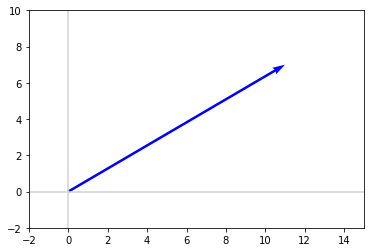

In [9]:
plot_vectors([Iv], ["blue"])
plt.xlim(-2,15)
plt.ylim(-2, 10)
plt.show()

## Reflection: Multiplication to flip over x-axis

In [10]:
E = np.array([[1,0], [0,-1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [11]:
Ev = np.dot(E,v)
Ev

array([11, -7])

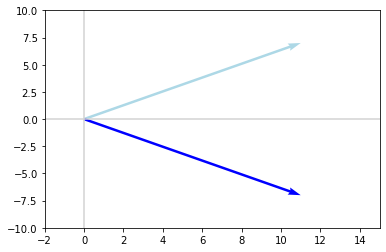

In [12]:
plot_vectors([v, Ev], ["lightblue", "blue"])
plt.xlim(-2,15)
plt.ylim(-10, 10)
plt.show()

## Reflection: Multiplication to flip over y-axis

In [13]:
F = np.array([[-1,0], [0,1]])
F

array([[-1,  0],
       [ 0,  1]])

In [14]:
Fv = np.dot(F,v)
Fv

array([-11,   7])

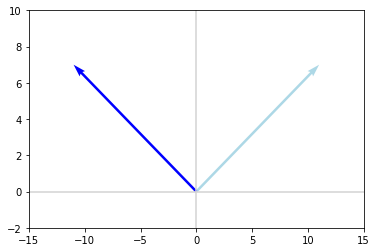

In [15]:
plot_vectors([v, Fv], ["lightblue", "blue"])
plt.xlim(-15,15)
plt.ylim(-2, 10)
plt.show()

## Vector concatenation & linearly independent transformation of columns (vectors)

In [16]:
v

array([11,  7])

In [17]:
v.shape

(2,)

In [18]:
np.matrix(v).shape

(1, 2)

In [19]:
np.matrix(v).T

matrix([[11],
        [ 7]])

In [20]:
np.matrix(v).T.shape

(2, 1)

In [21]:
v2 = np.array([-4, -4])
v3 = np.array([0, 6])

In [22]:
V = np.concatenate((np.matrix(v).T,
                    np.matrix(v2).T,
                    np.matrix(v3).T), axis=1)
V

matrix([[11, -4,  0],
        [ 7, -4,  6]])

In [23]:
V.shape

(2, 3)

In [24]:
I

array([[1, 0],
       [0, 1]])

In [25]:
I.shape

(2, 2)

In [26]:
IV = np.dot(I,V)
IV

matrix([[11, -4,  0],
        [ 7, -4,  6]])

In [27]:
A = np.array([[-3, 2], [0.5, -1.5]])
A

array([[-3. ,  2. ],
       [ 0.5, -1.5]])

In [28]:
A.shape

(2, 2)

In [29]:
AV = np.dot(A,V)
AV

matrix([[-19.,   4.,  12.],
        [ -5.,   4.,  -9.]])

In [30]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [31]:
vectorfy(V, 0)

array([11,  7])

In [32]:
vectorfy(V,0) == v

array([ True,  True])

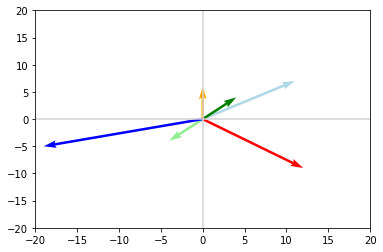

In [33]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2)], 
            ['lightblue', 'lightgreen', 'orange',
             'blue', 'green', 'red'])
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.show()